In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../../')
print(os.getcwd())
from load_config import load_config
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts import notebook_utils as nu
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier


/home/marshingjay/Repos/vivaldi/back_testing


In [2]:
# features = ["RSI", "MACD", "stosc_k", "stosc_d", "RateOfChange_MACD_1", "RateOfChange_MACD_5", "RateOfChange_MACD_10", "RateOfChange_MACD_60", "RateOfChange_RSI_1", "RateOfChange_RSI_5", "RateOfChange_RSI_10", "RateOfChange_RSI_60", "RateOfChange_close_1", "RateOfChange_close_5", "RateOfChange_close_10", "RateOfChange_close_60"]


In [3]:
dataset, features, indicators, scalers = nu.loadData(
                            indicators=[['cci', 'close'], ['psar', 'close'], ['optimal_v2', 'close']],
                            param_spec={},
                            optimal_threshold={"buy": 0.95},
                            spans=[{'indicator_name':'momentum',
                                    'column_name': 'CCI',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'roc',
                                    'column_name': 'PSAR',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'PSAR',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]}
                                    ],

                            scale='minmax')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




Loading data from COMPUSDT-1m...
Loading data from chunk 0...


In [4]:
final_dataset = dataset

In [5]:
dataset = []

In [6]:


train, test = train_test_split(final_dataset, test_size=0.05, shuffle=False)


<h3>Models</h3>
<p>Random Forest</p>
<p>Fine tuned RF</p>
<p>Gradient boost</p>
<p>GB inside RF</p>
<p>RF inside GB</p>
<p>LSTM</p>

In [7]:

buy_signals = train[train['optimal'] == 1.0]

In [8]:
mean_num_singals = int(len(buy_signals))

In [9]:
not_signals = train[train['optimal'] == 0.0]


In [10]:
print(mean_num_singals, len(not_signals))

1676 213881


In [11]:
not_signals_sampled = not_signals.sample(n=mean_num_singals * 8, random_state=69420, axis=0)
not_signals_sampled = not_signals_sampled.sample(frac=1)

In [12]:

balanced_data_buy = pd.concat([not_signals_sampled, buy_signals])
not_signals_sampled = []
buy_signals = []
not_signals = []


In [13]:
# filtered_balanced_data_buy = balanced_data_buy[["close", "stosc_k", "stosc_d", "slope", 'rsi']]
filtered_balanced_data_buy = balanced_data_buy[features]




balanced_data_optimal_buy = balanced_data_buy[['optimal']]
balanced_data_buy = []



In [14]:
filtered_balanced_data_buy

,CCI,PSAR,Momentum_CCI_period_1,Momentum_CCI_period_5,Momentum_CCI_period_10,RateOfChange_close_period_1,RateOfChange_close_period_5,RateOfChange_close_period_10,Momentum_close_period_1,Momentum_close_period_5,Momentum_close_period_10,Momentum_close_period_1,Momentum_close_period_5,Momentum_close_period_10,Momentum_PSAR_period_1,Momentum_PSAR_period_5,Momentum_PSAR_period_10
86189,0.657707,0.532036,0.490131,0.598199,0.550516,0.529214,0.570789,0.535544,0.447530,0.459703,0.429539,0.447530,0.459703,0.429539,0.460838,0.464809,0.461176
193531,0.611110,0.442594,0.506525,0.613442,0.597609,0.577457,0.612210,0.607553,0.492372,0.505256,0.488322,0.492372,0.505256,0.488322,0.460632,0.449615,0.438877
114171,0.634310,0.442090,0.535301,0.622195,0.591814,0.592522,0.617612,0.591758,0.504730,0.507078,0.482695,0.504730,0.507078,0.482695,0.453362,0.445863,0.441313
138795,0.633452,0.464099,0.509521,0.621977,0.582199,0.579786,0.617260,0.588169,0.493480,0.507460,0.478823,0.493480,0.507460,0.478823,0.459673,0.445501,0.449557
124685,0.574698,0.439282,0.523748,0.643180,0.594212,0.591299,0.628230,0.591085,0.502404,0.516552,0.481457,0.502404,0.516552,0.481457,0.459472,0.443903,0.451125
78768,0.666060,0.328507,0.534200,0.654476,0.608874,0.709663,0.754381,0.699211,0.621931,0.654828,0.592282,0.621931,0.654828,0.592282,0.423107,0.327465,0.329184
82411,0.591480,0.478465,0.499244,0.615671,0.571852,0.553724,0.610102,0.568328,0.469760,0.499469,0.460703,0.469760,0.499469,0.460703,0.500992,0.478095,0.488537
50130,0.607636,0.462692,0.475123,0.609967,0.548833,0.568921,0.614964,0.574691,0.486090,0.505696,0.469320,0.486090,0.505696,0.469320,0.463630,0.445166,0.451371
14168,0.680466,0.344860,0.515394,0.617457,0.588136,0.604446,0.626198,0.638405,0.517565,0.516139,0.530343,0.517565,0.516139,0.530343,0.457383,0.465963,0.450379
129212,0.671576,0.438862,0.510432,0.635319,0.591291,0.579212,0.647627,0.608566,0.493025,0.532403,0.494901,0.493025,0.532403,0.494901,0.462683,0.443300,0.451348


In [15]:

clf_buy = RandomForestClassifier(random_state=69420, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=2)

clf_buy.fit(filtered_balanced_data_buy, balanced_data_optimal_buy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=69420,
                       verbose=0, warm_start=False)

In [16]:
# from sklearn.inspection import permutation_importance
# feature_importances = permutation_importance(clf_buy, filtered_balanced_data_buy.values, balanced_data_optimal_buy.values, n_repeats=10, random_state=69420)

# for i in range(len(feature_importances.importances_mean)):
#     print('i: {}, Feature: {}, Score: {}'.format(i, filtered_balanced_data_buy.columns[i], feature_importances.importances_mean[i]))

In [17]:
def insert_buys(close, prediction):
    if prediction == 1:
        return close
    else:
        return None

def insert_sells(close, prediction):
    if prediction == -1:
        return close
    else:
        return None



In [18]:
import pickle

In [19]:
filtered_test = test[["close", 'optimal', 'volume']]
filtered_test_2 = test[features]

In [20]:
# filtered_sell = test[["close", "rsi", "MACD", "stosc_k", "stosc_d", "slope", "variance"]]

In [21]:
# sell_model = pickle.load(open('./v2/strategy/saved_models/optimal_v2_sell_rf.sav', 'rb'))

In [22]:
filtered_test['predict_buy'] = clf_buy.predict(filtered_test_2.values)
# filtered_test['predict_sell'] = sell_model.predict(filtered_sell)

In [23]:
len(filtered_test)

11346

In [24]:
len(filtered_test[filtered_test['predict_buy'] != 0.0])

272

In [25]:

filtered_test['buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.predict_buy), axis=1)
filtered_test['optimal_buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.optimal), axis=1)
# filtered_test['sell'] = filtered_test.apply(lambda x: insert_sells(x.close, x.predict_sell), axis=1)



In [26]:
from v2.strategy.indicators.bollinger_bands import BollingerBands

In [27]:
bollinger_bands_params = Param(0,0,0,'period',175)
boll = BollingerBands(_params=[bollinger_bands_params])
boll.genData(filtered_test, gen_new_values=False)


['boll_upper', 'boll_upper']

In [28]:
reset_filtered = filtered_test.reset_index(drop=True)

In [29]:
# reset_filtered

In [30]:
# reset_filtered['count'] = reset_filtered['sell'].rolling(60).count() - reset_filtered['buy'].rolling(60).count() 

In [31]:
# reset_filtered

In [32]:
first_amnt = reset_filtered
first_amnt['volume'] = first_amnt['volume'].rolling(window=10).mean()

<Figure size 432x288 with 0 Axes>

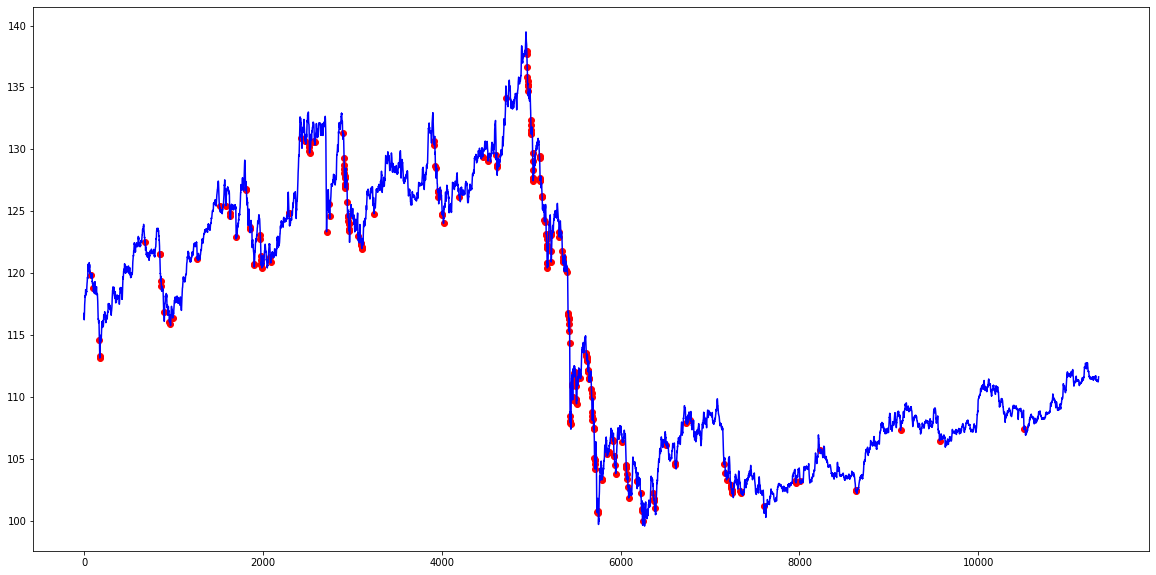

In [33]:
import matplotlib.pyplot as plt
plt.clf()

plt.figure(figsize=(20,10))
plt.scatter(x=first_amnt.index, y=first_amnt['buy'], color='red')

# plt.scatter(x=first_amnt.index, y=first_amnt['optimal_buy'], color='purple')

# plt.scatter(x=first_amnt.index, y=first_amnt['sell'], color='green')

plt.plot(first_amnt.index, first_amnt['close'], color='blue')
plt.show()

In [34]:
nu.exportModel(model=clf_buy, 
               name='test_model',
               new_version=False,
               indicators=indicators,
               features=filtered_test_2.columns,
               proba_threshold=0.0,
               is_nn=False)

In [35]:
stuff = pickle.load(open('./v2/strategy/saved_models/test_model/1_1/test_model_1_1.sav', 'rb'))

In [36]:
stuff

{'indicators': [<v2.strategy.indicators.cci.CCI at 0x7fa2a06e2cc0>,
 'features': Index(['CCI', 'PSAR', 'Momentum_CCI_period_1', 'Momentum_CCI_period_5',
        'Momentum_CCI_period_10', 'RateOfChange_close_period_1',
        'RateOfChange_close_period_5', 'RateOfChange_close_period_10',
        'Momentum_close_period_1', 'Momentum_close_period_5',
        'Momentum_close_period_10', 'Momentum_close_period_1',
        'Momentum_close_period_5', 'Momentum_close_period_10',
        'Momentum_PSAR_period_1', 'Momentum_PSAR_period_5',
        'Momentum_PSAR_period_10'],
       dtype='object'),
 'proba_threshold': 0.0,
 'model': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=2, min_samples_split=2,
            

In [ ]:
from v2.strategy.strategies.strategy import Strategy

good_strat_right_here = Strategy(entry_models=[['test_model', 'latest']])